In [33]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import accuracy_score, average_precision_score, roc_auc_score

In [10]:
DATA_PATH = "../data/DGraphFin/raw/dgraphfin.npz"

In [11]:
with np.load(DATA_PATH) as loader:
    x_np = loader['x']
    y_np = loader['y']
    edge_index_np = loader['edge_index']
    edge_timestamp_np = loader['edge_timestamp']
    edge_type_np = loader['edge_type']
    max_timestamp = np.max(edge_timestamp_np)

In [31]:
int(max(edge_timestamp_np))

821

In [13]:
def get_data_snapshot(start_time_index, end_time_index, x, y, edge_index, edge_timestamp):
    mask = (edge_timestamp >= start_time_index) & (edge_timestamp < end_time_index)
    selected_edges = edge_index[mask, :]
    unique_nodes = np.unique(selected_edges)
    df = pd.DataFrame({'node_id': unique_nodes})
    df['x'] = list(x[unique_nodes])
    df['y'] = y[unique_nodes]
    df = df[df['y'].isin([0,1])]
    return df

In [34]:
step_size = 7
for index, i in enumerate(range(1,220,step_size)):
    print("="*20)
    print(f"index:{index}")
    train_df = get_data_snapshot(i,i+step_size,x_np,y_np,edge_index_np,edge_timestamp_np)
    y_train = train_df['y'].values
    print(Counter(y_train))

index:0
Counter({np.int64(0): 20548, np.int64(1): 435})
index:1
Counter({np.int64(0): 20476, np.int64(1): 480})
index:2
Counter({np.int64(0): 20633, np.int64(1): 486})
index:3
Counter({np.int64(0): 20753, np.int64(1): 530})
index:4
Counter({np.int64(0): 28115, np.int64(1): 389})
index:5
Counter({np.int64(0): 38604, np.int64(1): 332})
index:6
Counter({np.int64(0): 34414, np.int64(1): 314})
index:7
Counter({np.int64(0): 32398, np.int64(1): 280})
index:8
Counter({np.int64(0): 28753, np.int64(1): 242})
index:9
Counter({np.int64(0): 17835, np.int64(1): 132})
index:10
Counter({np.int64(0): 22443, np.int64(1): 194})
index:11
Counter({np.int64(0): 25266, np.int64(1): 243})
index:12
Counter({np.int64(0): 24961, np.int64(1): 255})
index:13
Counter({np.int64(0): 25027, np.int64(1): 260})
index:14
Counter({np.int64(0): 23203, np.int64(1): 282})
index:15
Counter({np.int64(0): 23309, np.int64(1): 277})
index:16
Counter({np.int64(0): 22992, np.int64(1): 240})
index:17
Counter({np.int64(0): 24042, np.

In [14]:
train_df = get_data_snapshot(1,2,x_np,y_np,edge_index_np,edge_timestamp_np)
test_df = get_data_snapshot(2,3,x_np,y_np,edge_index_np,edge_timestamp_np)
X_train = np.vstack(train_df['x'].values)
y_train = train_df['y'].values
X_test = np.vstack(test_df['x'].values)
y_test = test_df['y'].values

In [15]:
X_train

array([[ 1.        ,  6.        ,  0.08      , ...,  0.33333333,
         0.0625    ,  0.33333333],
       [ 1.        ,  4.        ,  0.6       , ...,  0.6       ,
         0.025     ,  0.6       ],
       [ 0.        ,  3.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       ...,
       [-1.        , -1.        ,  0.975     , ...,  0.75      ,
         0.01025641,  0.5       ],
       [-1.        , -1.        ,  0.27      , ...,  1.        ,
        -1.        , -1.        ],
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ]])

In [24]:
step_size = 7
results = []
for index, i in enumerate(range(1,220,step_size)):
    print("="*20)
    print(f"index:{index}")
    train_df = get_data_snapshot(i,i+step_size,x_np,y_np,edge_index_np,edge_timestamp_np)
    test_df = get_data_snapshot(i+step_size,i+step_size+step_size,x_np,y_np,edge_index_np,edge_timestamp_np)
    test_nodes = set(test_df['node_id'])
    train_df = train_df[~train_df['node_id'].isin(test_nodes)]
    X_train = np.vstack(train_df['x'].values)
    y_train = train_df['y'].values
    X_test = np.vstack(test_df['x'].values)
    y_test = test_df['y'].values
    model = xgb.XGBClassifier(eval_metric='logloss')
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    accuracy = accuracy_score(y_test, y_pred)
    avg_precision = average_precision_score(y_test, y_prob)
    auc_roc = roc_auc_score(y_test, y_prob)
    results.append({
        'index': index,
        'accuracy': accuracy,
        'avg_precision': avg_precision,
        'auc_roc': auc_roc
    })
    print(f'XGBoost Model Accuracy: {accuracy:.4f}')
    print(f'Average Precision Score: {avg_precision:.4f}')
    print(f'AUC-ROC Score: {auc_roc:.4f}')



index:0
XGBoost Model Accuracy: 0.9771
Average Precision Score: 0.0455
AUC-ROC Score: 0.7154
index:1
XGBoost Model Accuracy: 0.9770
Average Precision Score: 0.0444
AUC-ROC Score: 0.7180
index:2
XGBoost Model Accuracy: 0.9751
Average Precision Score: 0.0484
AUC-ROC Score: 0.7286
index:3
XGBoost Model Accuracy: 0.9864
Average Precision Score: 0.0331
AUC-ROC Score: 0.7619
index:4
XGBoost Model Accuracy: 0.9915
Average Precision Score: 0.0232
AUC-ROC Score: 0.7638
index:5
XGBoost Model Accuracy: 0.9910
Average Precision Score: 0.0247
AUC-ROC Score: 0.7463
index:6
XGBoost Model Accuracy: 0.9914
Average Precision Score: 0.0237
AUC-ROC Score: 0.7607
index:7
XGBoost Model Accuracy: 0.9916
Average Precision Score: 0.0200
AUC-ROC Score: 0.7538
index:8
XGBoost Model Accuracy: 0.9927
Average Precision Score: 0.0168
AUC-ROC Score: 0.7329
index:9
XGBoost Model Accuracy: 0.9914
Average Precision Score: 0.0165
AUC-ROC Score: 0.6976
index:10
XGBoost Model Accuracy: 0.9904
Average Precision Score: 0.022

In [27]:
results_df = pd.DataFrame(results)


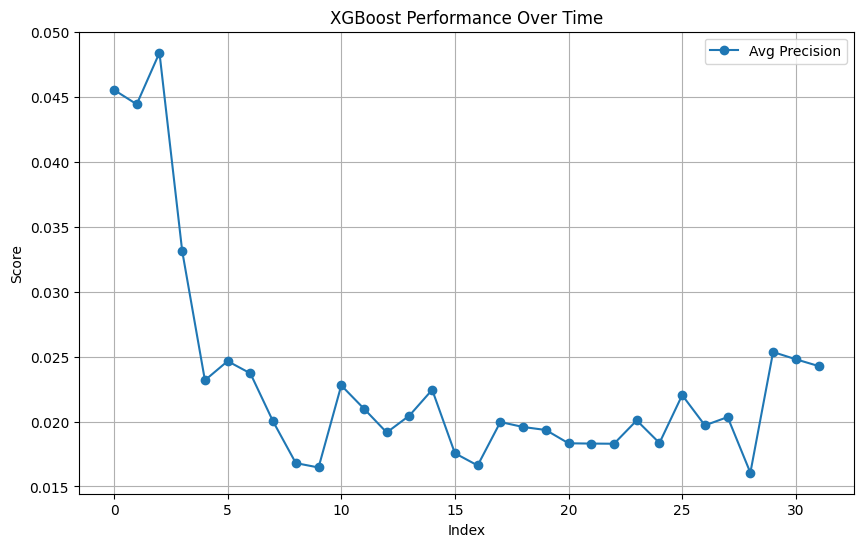

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(results_df['index'], results_df['avg_precision'], label='Avg Precision', marker="o")
# plt.plot(results_df['index'], results_df['avg_precision'], label='Avg Precision')
# plt.plot(results_df['index'], results_df['auc_roc'], label='AUC-ROC')
plt.xlabel('Index')
plt.ylabel('Score')
plt.title('XGBoost Performance Over Time')
plt.legend()
plt.grid(True)
plt.show()

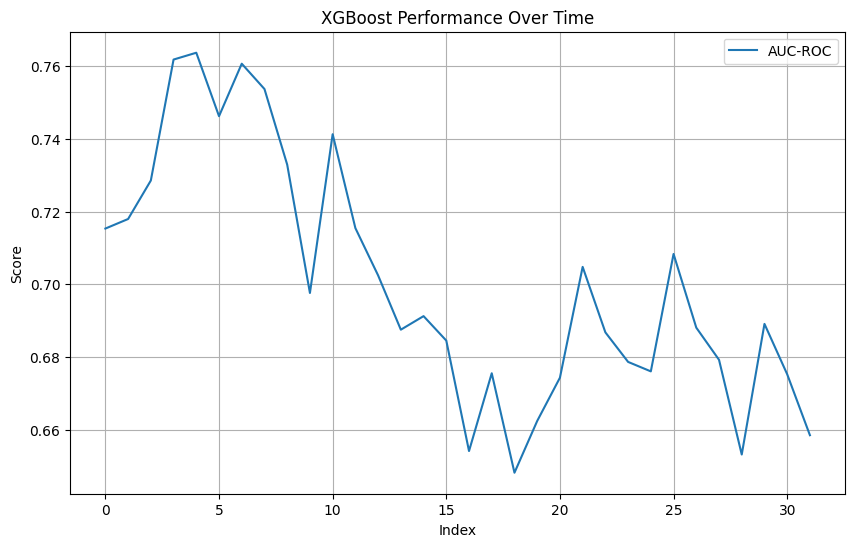

In [29]:
plt.figure(figsize=(10, 6))
# plt.plot(results_df['index'], results_df['avg_precision'], label='Avg Precision', marker="o")
plt.plot(results_df['index'], results_df['auc_roc'], label='AUC-ROC')
plt.xlabel('Index')
plt.ylabel('Score')
plt.title('XGBoost Performance Over Time')
plt.legend()
plt.grid(True)
plt.show()